In [1]:
install.packages('tidyverse')#installing tidyverse

Installing package into 'C:/Users/DELL/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DELL\AppData\Local\Temp\RtmpEHSEdf\downloaded_packages


In [2]:
library(tidyverse)# loading tidyverse

Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
Thailand <- read_csv('http://data.insideairbnb.com/thailand/central-thailand/bangkok/2023-09-22/data/listings.csv.gz')#reading the csv to work with the data

Rows: 20823 Columns: 75
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (24): listing_url, source, name, description, neighborhood_overview, pi...
dbl  (37): id, scrape_id, host_id, host_listings_count, host_total_listings_...
lgl   (9): host_is_superhost, host_has_profile_pic, host_identity_verified, ...
date  (5): last_scraped, host_since, calendar_last_scraped, first_review, la...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
glimpse(Thailand)# taking a look at the data to understand the content

Rows: 20,823
Columns: 75
$ id                                           <dbl> 9.568890e+17, 4.097175e+0…
$ listing_url                                  <chr> "https://www.airbnb.com/r…
$ scrape_id                                    <dbl> 2.023092e+13, 2.023092e+1…
$ last_scraped                                 <date> 2023-09-22, 2023-09-22, …
$ source                                       <chr> "city scrape", "city scra…
$ name                                         <chr> "Rental unit in Khet Bang…
$ description                                  <chr> "坐落曼谷唯一蓝色地铁环线…
$ neighborhood_overview                        <chr> NA, NA, NA, NA, NA, NA, N…
$ picture_url                                  <chr> "https://a0.muscache.com/…
$ host_id                                      <dbl> 325788794, 79150947, 3272…
$ host_url                                     <chr> "https://www.airbnb.com/u…
$ host_name                                    <chr> "海进", "Ruby", "Pisan", …
$ host_since                 

In [5]:
Thailand$price <- as.numeric(gsub("\\$", "", Thailand$price))# converting the price column into numeric format and removing the dollar symbol

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [6]:
Thailand <- Thailand %>% select(price,bedrooms,bathrooms_text)#selecting price, bedrooms, bathrooms_text from the Spain data set and placing it under a new variable so that it is easy to work with
Thailand #viewing the selected data

price,bedrooms,bathrooms_text
<dbl>,<dbl>,<chr>
430,1,1.5 baths
619,1,1 bath
NA,NA,1 bath
NA,1,1 bath
NA,NA,1 bath
500,1,1 bath
720,NA,2 baths
NA,NA,1 private bath
640,NA,1 private bath


In [7]:
#loading necessary libraries to plot the data 
library(ggplot2)
library(jsonlite)
library(httr)

Warning message:
"package 'jsonlite' was built under R version 4.2.3"

Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten


Warning message:
"package 'httr' was built under R version 4.2.3"


In [15]:
api_key <- "58c8eb71a98bc0e70380918c4ec1041c" #setting the api key
response <- GET(paste0("http://data.fixer.io/api/latest?access_key=", api_key, "&symbols=THB,NZD")) #sending HTTP GET request to fixer.io to get the latest exchange rates between THB and NZD
data <- fromJSON(content(response, as = "text")) #processes response from API that converts JSON content into a data structure that ca be easily accessed
exchange_rate_thb_to_nzd <- data$rate$NZD / data$rates$THB #calculates exchange rates from EUR to NZD using rates retrieved from API response
Thailand$price <- Thailand$price * exchange_rate_thb_to_nzd # multiplies price column with calculated exchange rates 
Thailand <- Thailand %>%
mutate(price_nzd = price * exchange_rate_thb_to_nzd) %>% #creates new column that multiplies price with the exchange rate
select(price_nzd, bathrooms_text, bedrooms)
Thailand #displaying the modified data

price_nzd,bathrooms_text,bedrooms
<dbl>,<chr>,<dbl>
0.932896,1.5 baths,1
1.342936,1 bath,1
NA,1 bath,NA
NA,1 bath,1
NA,1 bath,NA
1.084763,1 bath,1
1.562058,2 baths,NA
NA,1 private bath,NA
1.388496,1 private bath,NA


In [16]:
Thailand_data <-Thailand[1:100, ] #using 100 entries of the dataset

Warning message:
"Removed 62 rows containing non-finite values (`stat_bin()`)."


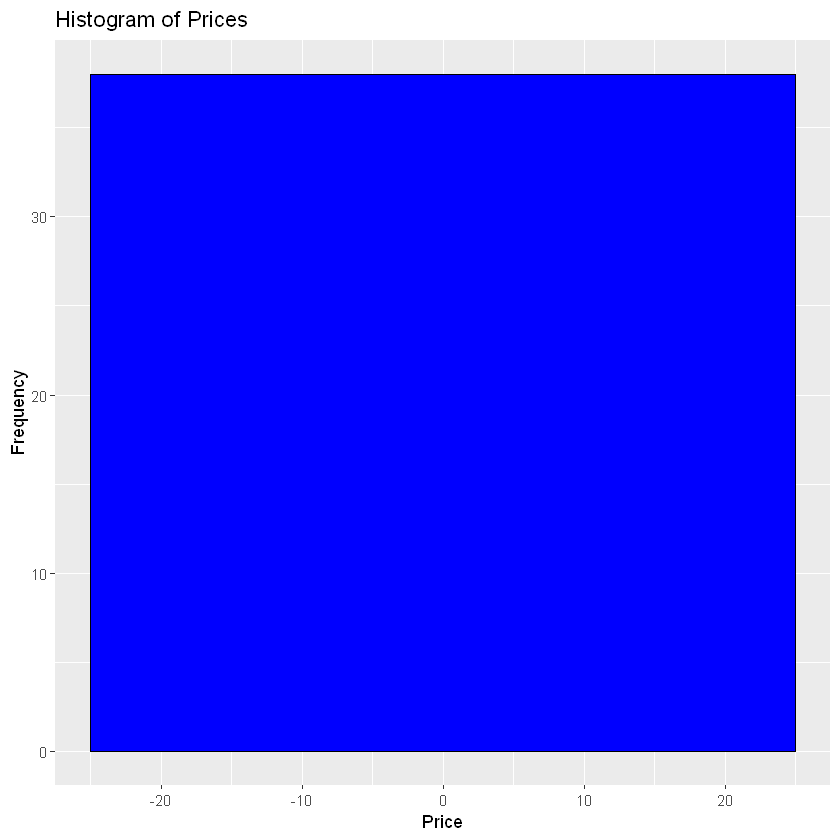

In [18]:
Thailand_data$price <- as.numeric(Thailand_data$price_nzd)
Thailand_plot_price <- ggplot(Thailand_data, aes(x = price_nzd)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "black") + #plotting a histogram that gives us an idea of the price
  labs(title = "Histogram of Prices",
       x = "Price",
       y = "Frequency")
Thailand_plot_price

Warning message:
"Removed 31 rows containing missing values (`position_stack()`)."


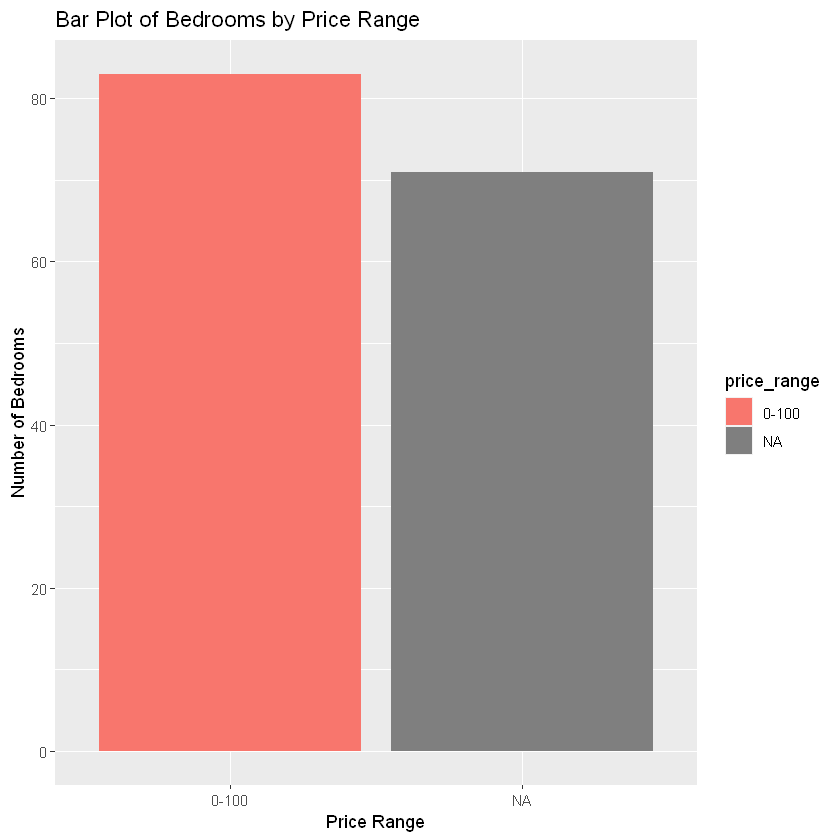

In [19]:
Thailand_data <- Thailand_data %>%
   mutate(price_range = cut(as.numeric(gsub("[$,]", "", price_nzd)), 
                           breaks = c(0, 100, 200, 300, 400, Inf),  #breaks specifies bin edges
                           labels = c("0-100", "101-200", "201-300", "301-400", "401+"))) #labels assigns labels to bins

Thailand_plot_price_bedrooms <- ggplot(Thailand_data, aes(x = price_range, y = bedrooms, fill = price_range)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Bedrooms by Price Range",
       x = "Price Range",
       y = "Number of Bedrooms")          #makes a bar plot with price range on x axis and bedrooms on y axis
Thailand_plot_price_bedrooms

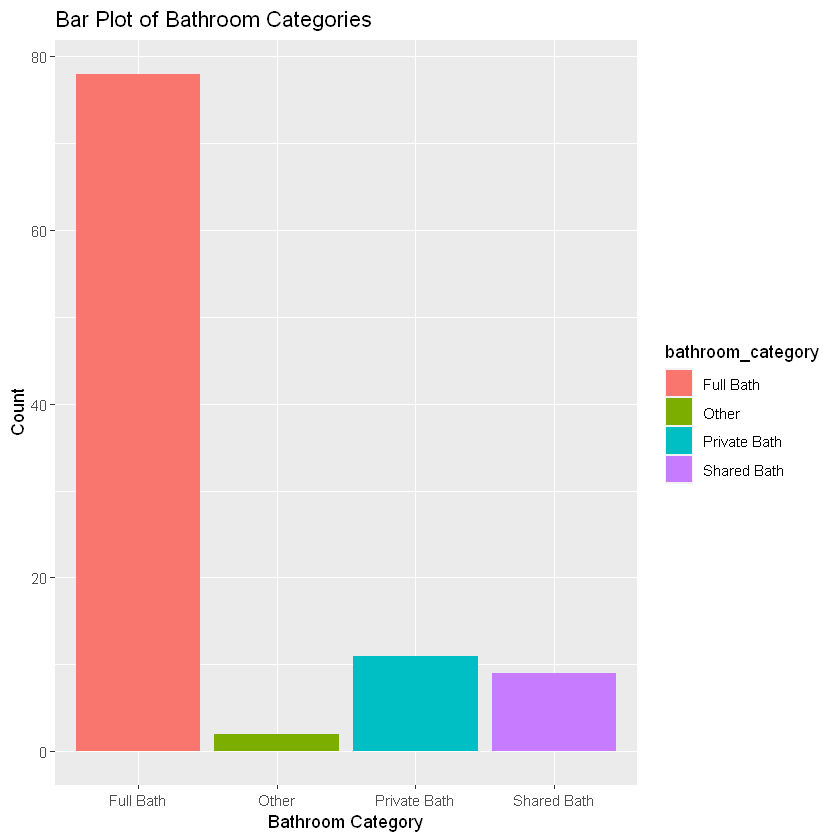

In [20]:
Thailand_data <- Thailand_data %>%
  mutate(bathroom_category = case_when(
    grepl("shared", bathrooms_text, ignore.case = TRUE) ~ "Shared Bath",
    grepl("private", bathrooms_text, ignore.case = TRUE) ~ "Private Bath",
    grepl("half", bathrooms_text, ignore.case = TRUE) ~ "Half Bath",   #creates a new column that categorises bathroom into shared, private, half, full and other
    grepl("bath", bathrooms_text, ignore.case = TRUE) ~ "Full Bath",
    TRUE ~ "Other"
  ))

Thailand_plot_bathroom_text <- ggplot(Thailand_data, aes(x = bathroom_category, fill = bathroom_category)) +
  geom_bar() +
  labs(title = "Bar Plot of Bathroom Categories",
       x = "Bathroom Category",
       y = "Count")              #plots bar graph that gives us an idea of the bathrom categories in the data 


Thailand_plot_bathroom_text

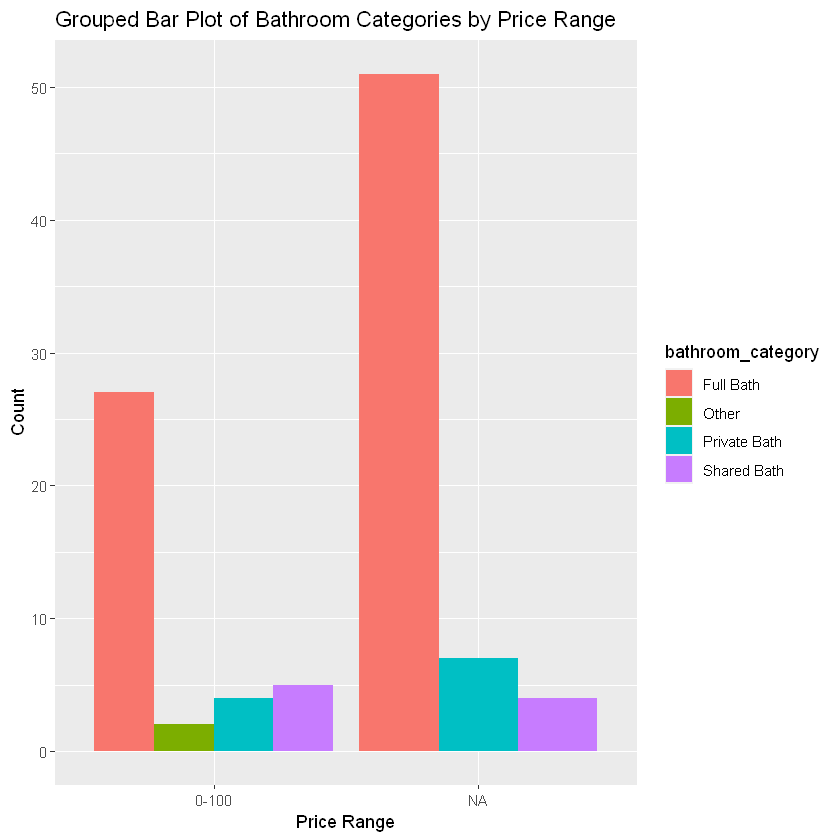

In [21]:
Thailand_plot_bathroom_price <- ggplot(Thailand_data, aes(x = price_range, fill = bathroom_category)) +
  geom_bar(position = "dodge") +
  labs(title = "Grouped Bar Plot of Bathroom Categories by Price Range",
       x = "Price Range",           #creates a grouped bar plot which is grouped based on type of bathroom and has price range on x axis 
       y = "Count")
Thailand_plot_bathroom_price